### Imports

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns

## Importing Data

In [2]:
df = pd.read_csv(r'D:\All_Docs\Masters\CS 584 Machine Learning\Project\Data\vehicles.csv', index_col=0)

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [5]:
df = df.drop(columns=['id', 'url', 'region', 'region_url', 'VIN', 'image_url', 'description', 'state', 'state', 'lat', 'long', 'posting_date'])

In [6]:
len(df)

458213

In [7]:
df.describe()

,price,year,odometer
count,4.582130e+05,457163.000000,4.029100e+05
mean,4.042093e+04,2010.746067,1.016698e+05
std,8.194599e+06,8.868136,3.228623e+06
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2008.000000,4.087700e+04
50%,1.099500e+04,2013.000000,8.764100e+04
75%,2.149500e+04,2016.000000,1.340000e+05
max,3.615215e+09,2021.000000,2.043756e+09


## Data Preprocessing

### Checking for Null values

In [8]:
for i in df.columns:
    if not df[i].isnull().values.any():
        print(i)

price


year 
manufacturer
model 
condition

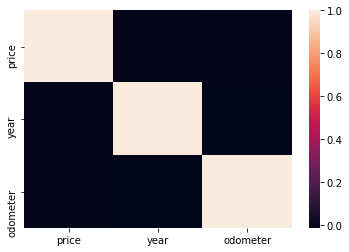

In [10]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.dropna()

In [13]:
df = df.dropna(axis = 0, subset = ['year'])

C:\Users\monic\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year'>

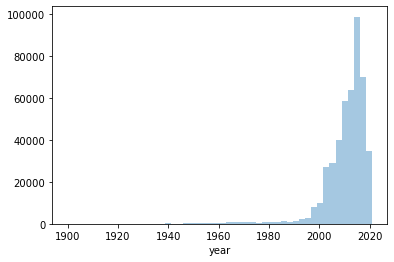

In [17]:
sns.distplot(df.year, kde = False)

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

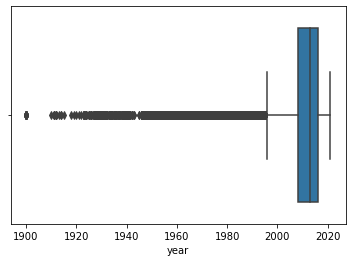

In [18]:
sns.boxplot(df.year)

In [28]:
df['manufacturer'].isna().sum()

17173

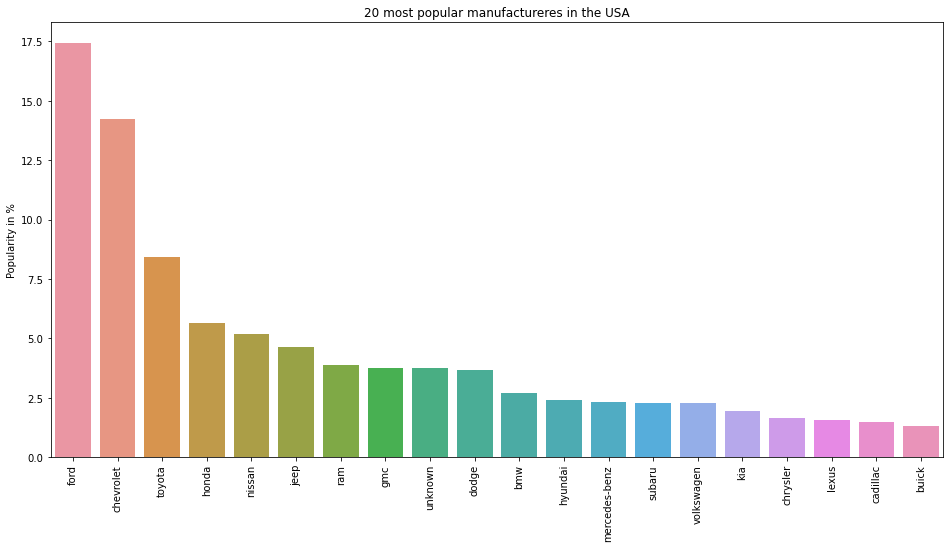

In [52]:
manufacturers = df["manufacturer"].value_counts().div(len(df)).mul(100)
manufactuters_TOP20 = manufacturers[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=manufactuters_TOP20.index, y=manufactuters_TOP20.values)
plt.title("20 most popular manufactureres in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

In [29]:
df['manufacturer'] = df['manufacturer'].fillna("unknown")

In [30]:
df['model'].isna().sum()

4817

In [41]:
df[df['model'] == '$$ CASH 4 JUNK CARS']

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
349439,1500,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,NaN
350064,1000,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,NaN
350159,1000,2000.0,unknown,$$ CASH 4 JUNK CARS,salvage,other,gas,NaN,salvage,other,fwd,NaN,NaN,NaN


In [42]:
df['model'] = df['model'].replace(['$$ CASH 4 JUNK CARS'],'Junk Cars')

In [ ]:
sns.barplot(x=df['model'].index, y=df['model'].values)
plt.show()

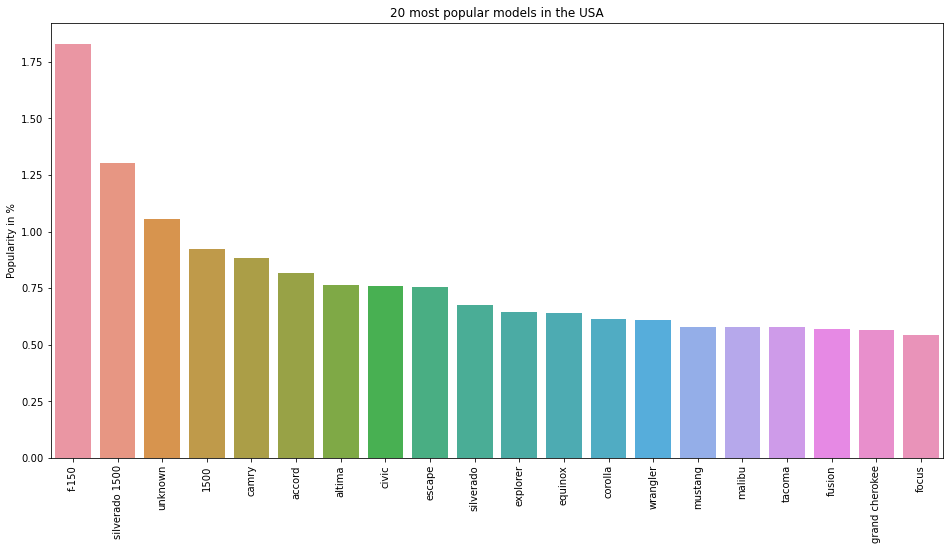

In [56]:
models = df["model"].value_counts().div(len(df)).mul(100)
models_TOP20 = models[:20]

plt.figure(figsize=(16,8))
sns.barplot(x=models_TOP20.index, y=models_TOP20.values)
plt.title("20 most popular models in the USA")
plt.ylabel("Popularity in %")
plt.xticks(rotation=90)
plt.show()

In [44]:
df['model'] = df['model'].fillna('unknown')

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


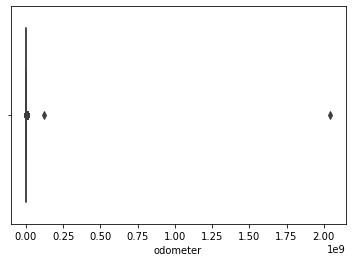

In [62]:
sns.boxplot(df['odometer'])
plt.show()

In [73]:
df = df[(df.odometer < 250000) & (df.odometer > 10)]

C:\Users\monic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odometer'>

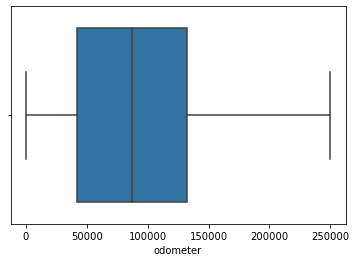

In [74]:
sns.boxplot(df['odometer'])

In [75]:
df['odometer'].isna().sum()

0

In [76]:
len(df)

391349